LOGESHWARAN K

A project for an internship at "The Sparks Foundation"

TASK 4 - Exploratory Data Analysis - Terrorism

DOMAIN - Data Science and Business Analytics

BATCH - JUNE 2023

Importing Libaries

In [47]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

Loading and Processing the Dataset

In [48]:
df = pd.read_csv("/home/syntaxerror/Desktop/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

/tmp/ipykernel_2359/3999230177.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [49]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [50]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [51]:
df.rename(columns={
    'iyear':"Year",
    'imonth':"Month",
    "iday":"Day",
    'latitude':'Latitude',
    'longitude':'Longitude',
    'country_txt':'Country',
    'provstate':'State',
    'region_txt':"Region",
    'city':"City",
    'attacktype1_txt':'AttackType',
    'target1':'Target',
    'nkill':'Killed',
    'nwound':'Wounded',
    'summary':"Summary",
    'gname':"Group",
    'targtype1_txt':"TargetType",
    'weaptype1_txt':'WeaponType',
    'motive':"Motive"
},inplace=True)

In [52]:
df = df[['Year','Month','Day','Country','State',
        'Region','City','Latitude','Longitude','AttackType',
        'Killed','Wounded','Target','Group','WeaponType','TargetType','Motive']]

In [53]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Group,WeaponType,TargetType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Unknown,Private Citizens & Property,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Unknown,Government (Diplomatic),NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Unknown,Journalists & Media,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Explosives,Government (Diplomatic),NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Incendiary,Government (Diplomatic),NaN


In [54]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


Exploratory Data Analysis

Histogram

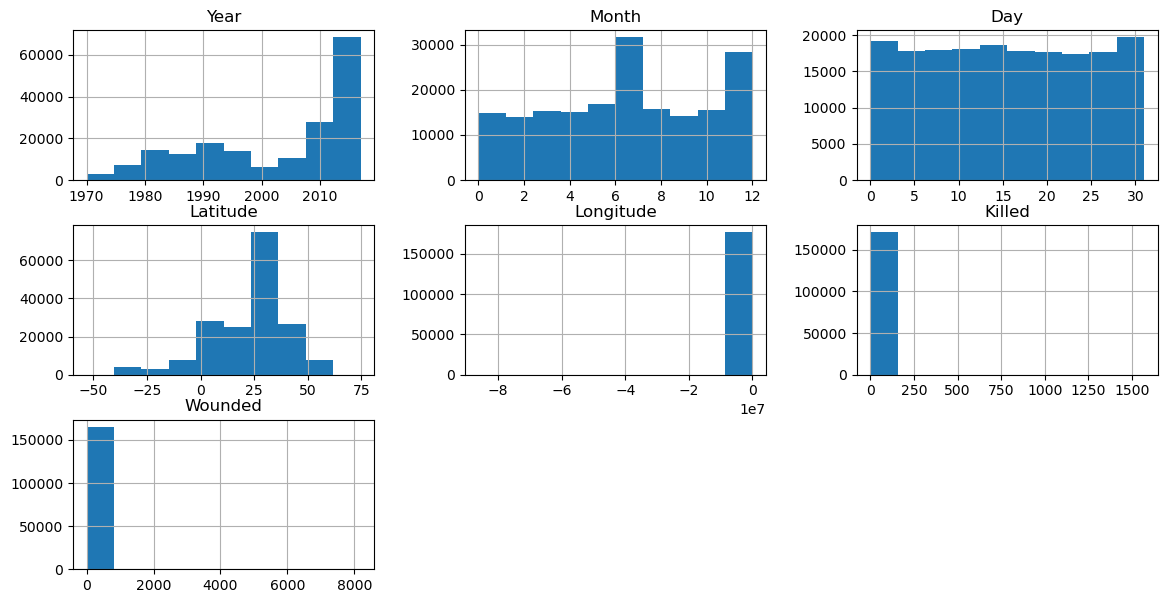

In [55]:
df.hist(figsize=(14,7))
plt.show()

Correlation Analysis

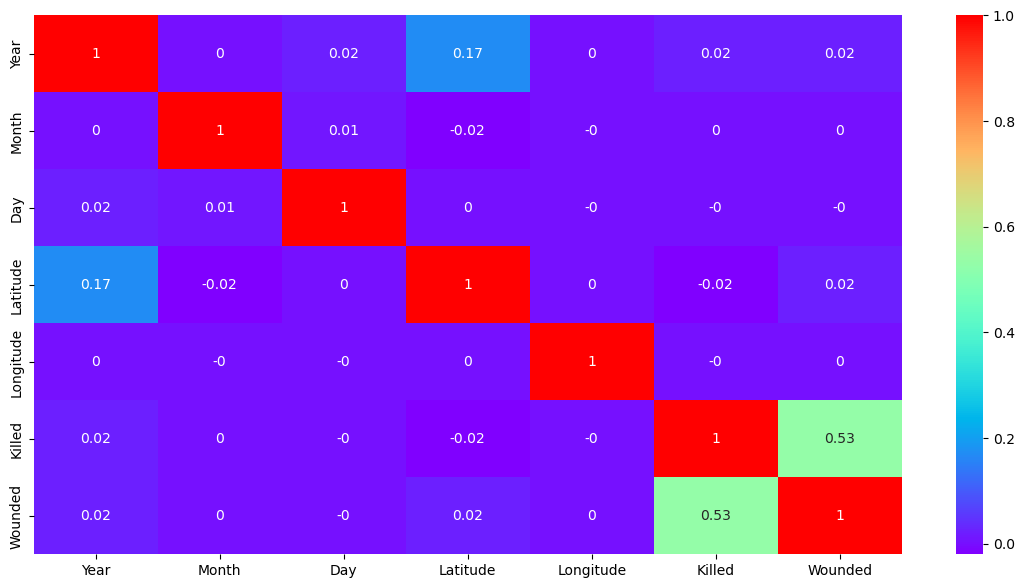

In [56]:
plt.figure(figsize=(14,7))
sns.heatmap(np.round(df.corr(),2),annot=True,cmap='rainbow')
plt.show()

Problem Statement : As a Security Analyst, Try to find out the hot zone of Terrorism.

Terrorist Activities by Region in Each Year

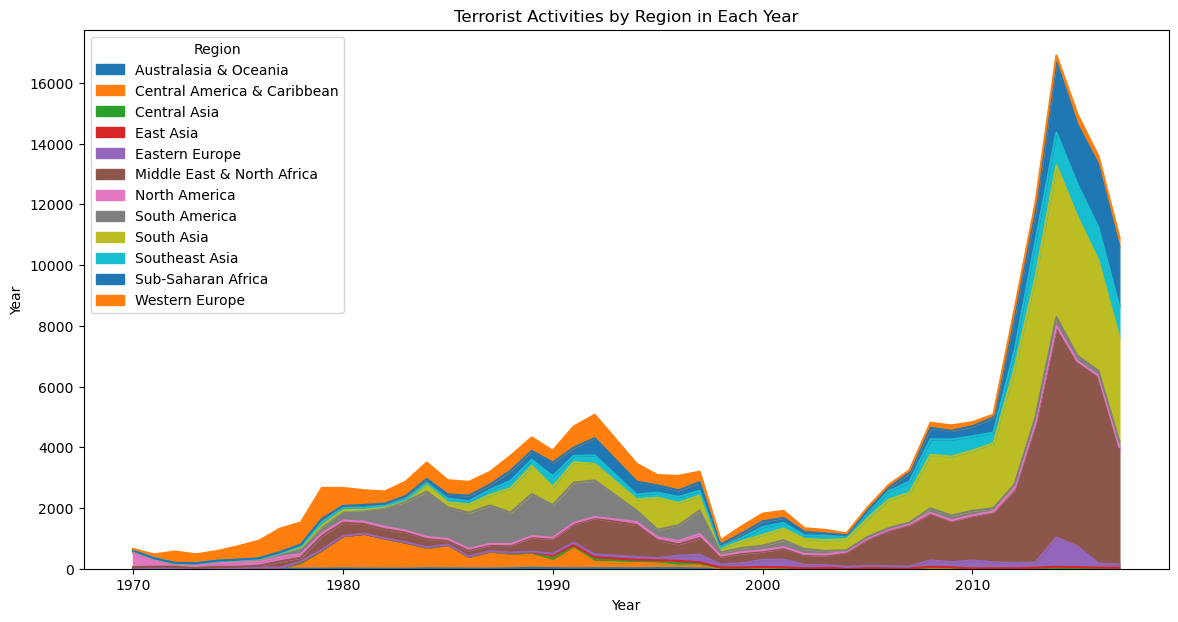

In [57]:
pd.crosstab(df.Year,df.Region).plot(kind="area",figsize=(14,7))
plt.title("Terrorist Activities by Region in Each Year")
plt.ylabel("Year")
plt.show()

Number of Terrorist Activity in Each Year

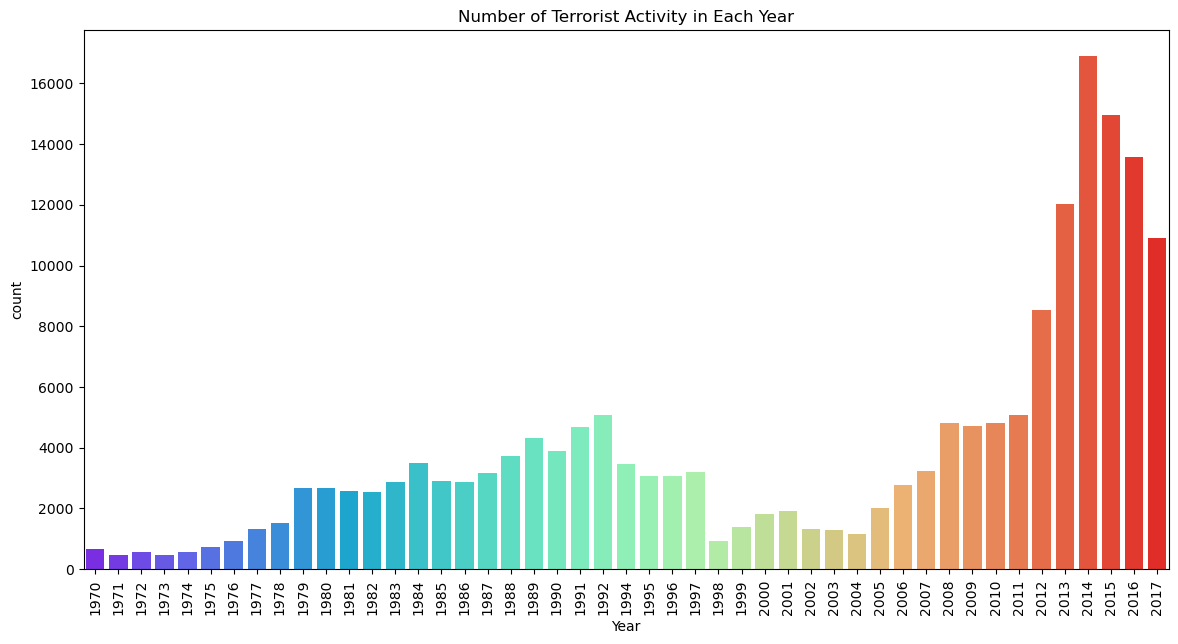

In [58]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Year",data=df,palette='rainbow')
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activity in Each Year")
plt.xlabel("Year")
plt.show()

Method Of Attack

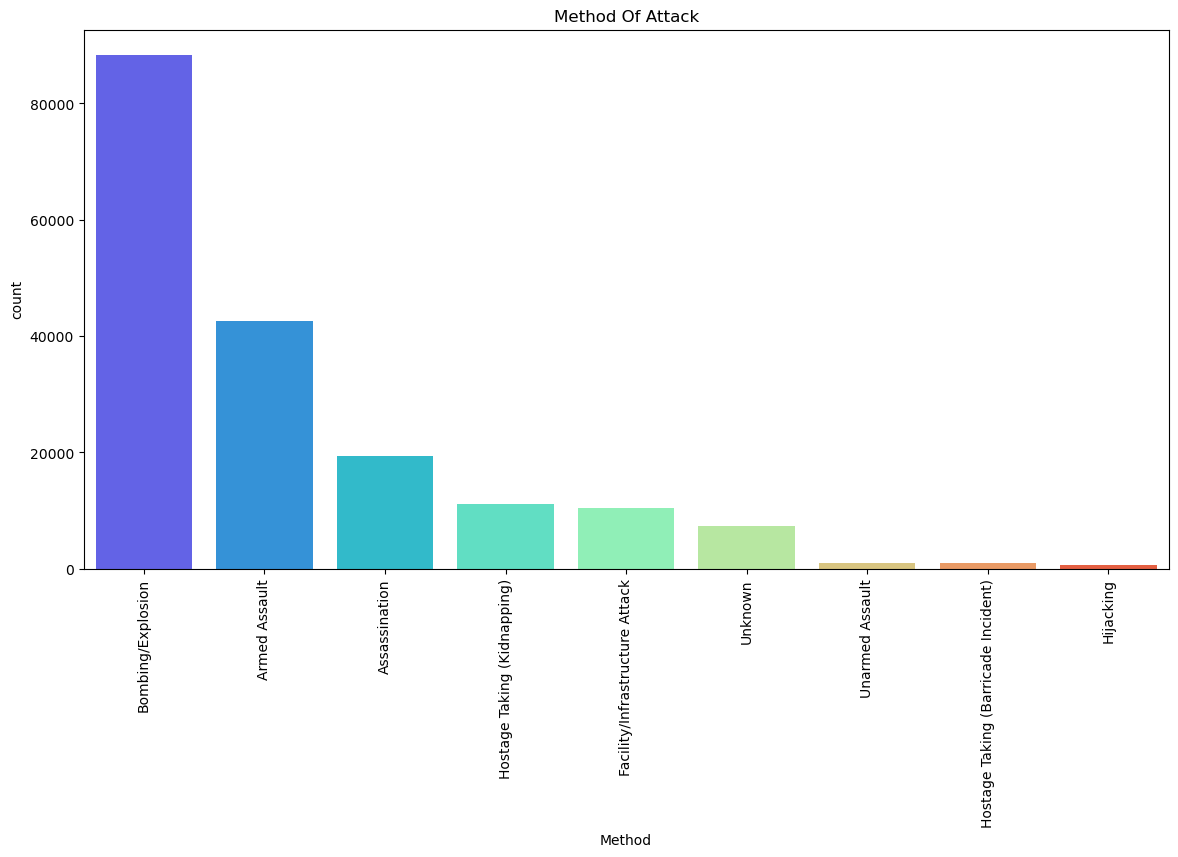

In [59]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['AttackType'],order=df['AttackType'].value_counts().index,palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Method")
plt.title("Method Of Attack")
plt.show()

Type of Target

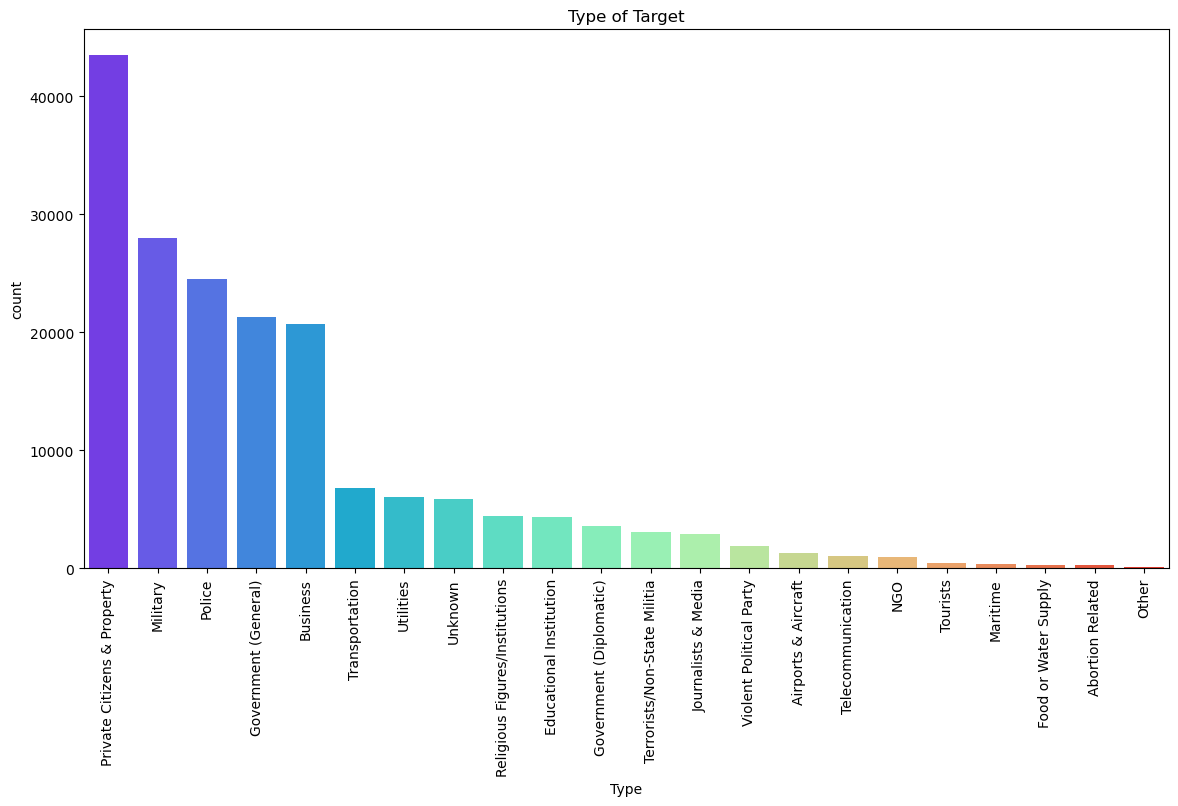

In [60]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['TargetType'],order=df['TargetType'].value_counts().index,palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.title("Type of Target")
plt.show()

Terrorist Attacks Per Country

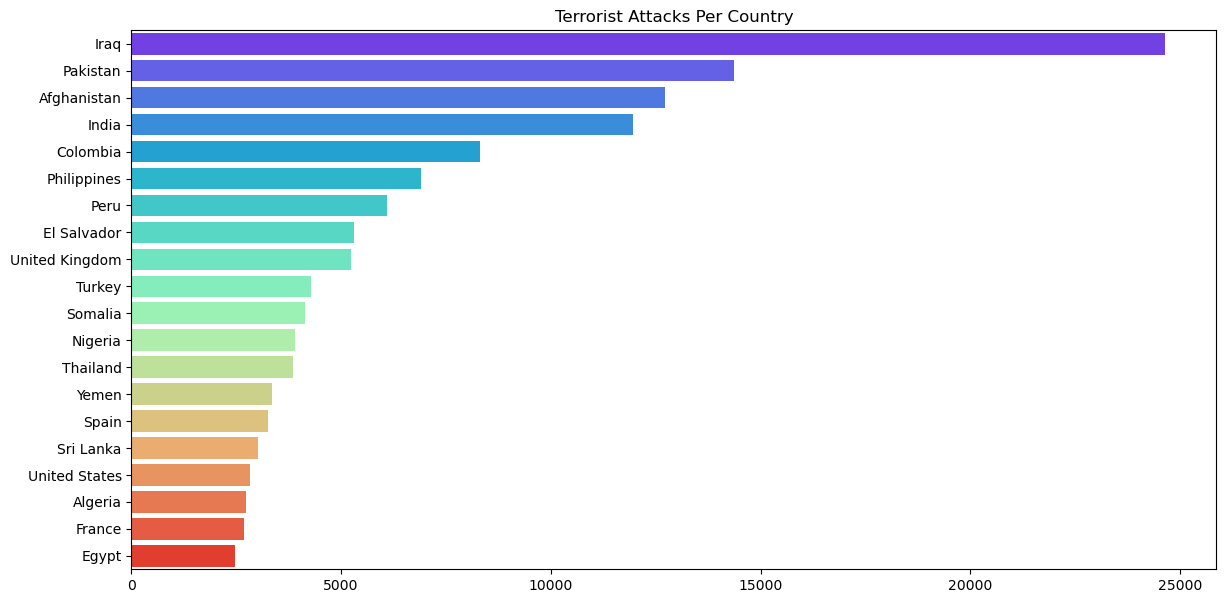

In [61]:
plt.figure(figsize=(14,7))
sns.barplot(x = df['Country'].value_counts()[:20].values,y=df['Country'].value_counts()[:20].index,palette='rainbow')
plt.title("Terrorist Attacks Per Country")
plt.show()


Terrorist Attacks Per Region

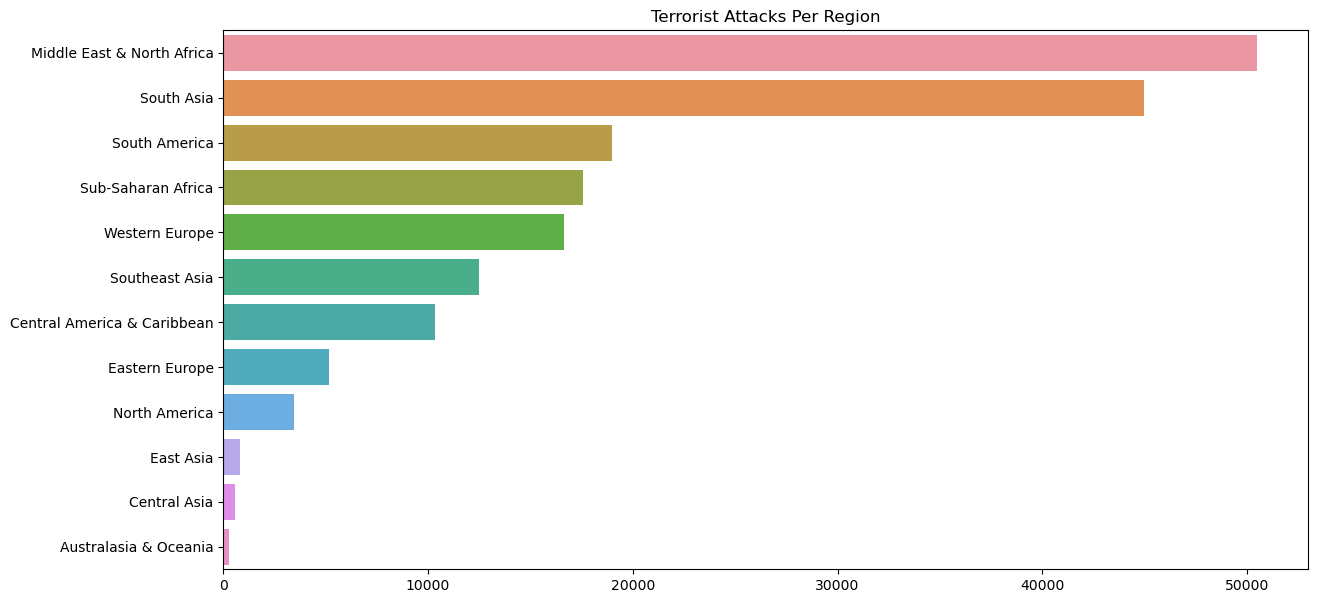

In [62]:
plt.figure(figsize=(14,7))
sns.barplot(x = df['Region'].value_counts().values,y=df['Region'].value_counts().index)
plt.title("Terrorist Attacks Per Region")
plt.show()

In [63]:
terr = df.groupby(['Country'],as_index=False).count()

In [64]:
max_count = terr['Year'].max()
max_id = terr['Year'].idxmax()
max_name = terr['Country'][max_id]
min_count = terr['Year'].min()
min_id = terr['Year'].idxmin()
min_name = terr['Country'][min_id]

In [65]:
print(f"{max_name} has suffered the maximum number of terror attacks of {max_count}")
print(f"{min_name} has suffered the mininum number of terror attacks of {min_count}")

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the mininum number of terror attacks of 1


Most Active Terrorist Organisation

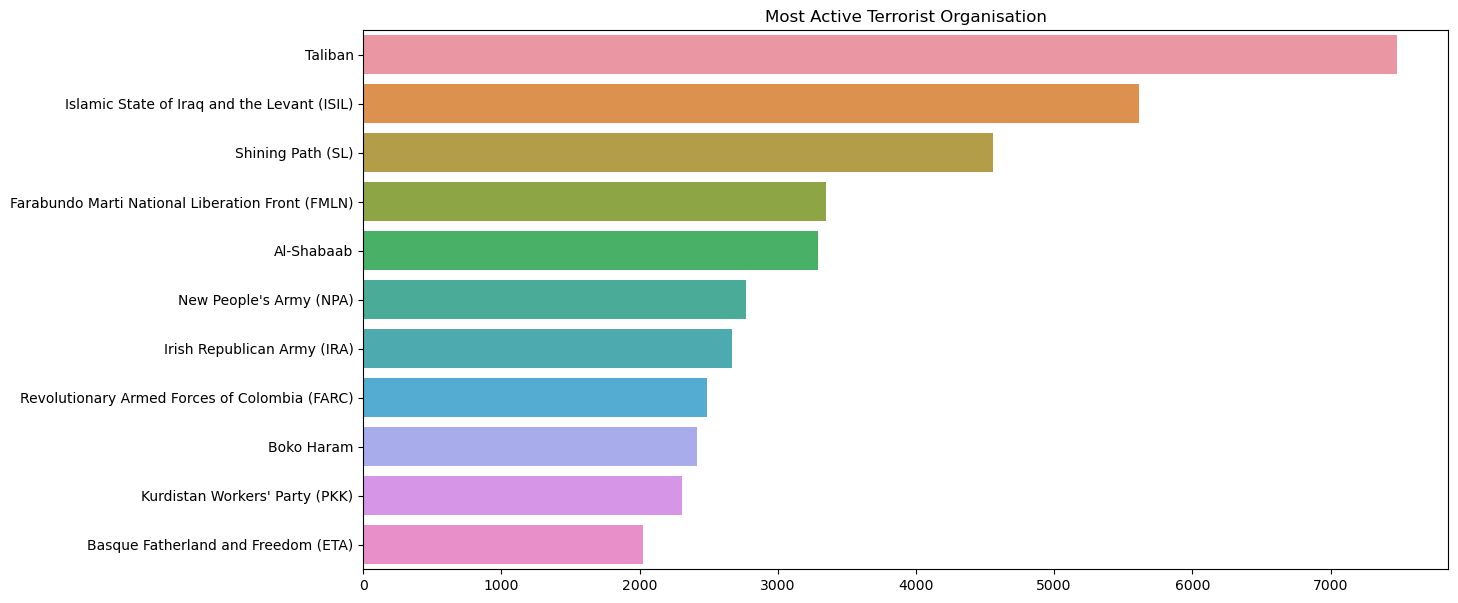

In [66]:
plt.subplots(figsize=(14,7))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values)
plt.title("Most Active Terrorist Organisation")
plt.show()

Conclusion:

From the above analysis, We are concluding the following takeaways,

1) The Terrorist Activites are in peeked during 2014.
2) Bombing/Explosions are the maximun number of attacks.
3) Private citizens and Property are affected in maximum number of attacks
4) Iraq has the most attacks.
5) The Middle East and North America Regions has most targeted.
6) Taliban an ISIL are the most active organisation.


From the above takeaways, we have provided a solution for our problem statement and has the program has been successfully completed.